In [1]:
#Import packages
from arcgis import GIS
import pandas as pd
from glob import glob

In [2]:
#Create the GIS link
gis = GIS('pro')

In [3]:
#Get a list of the csv files in the box folder
csv_files = glob(r'C:\Users\jpfay\Box\Hg Map- Files to Process\USABLE Data\Processed in ArcGIS\*.csv')
csv_files

['C:\\Users\\jpfay\\Box\\Hg Map- Files to Process\\USABLE Data\\Processed in ArcGIS\\cleaned_HGMAPS.csv',
 'C:\\Users\\jpfay\\Box\\Hg Map- Files to Process\\USABLE Data\\Processed in ArcGIS\\FishAnalysisLagCategories_final.csv',
 'C:\\Users\\jpfay\\Box\\Hg Map- Files to Process\\USABLE Data\\Processed in ArcGIS\\sediment_analysis_final.csv',
 'C:\\Users\\jpfay\\Box\\Hg Map- Files to Process\\USABLE Data\\Processed in ArcGIS\\suspendedparticles_final.csv']

In [44]:
#Import the first file into pandas & show columns imported
df = pd.read_csv(csv_files[0])
df.shape

(3259, 20)

In [45]:
#Show info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community           3259 non-null   object 
 1   mean_HG_adultmen    720 non-null    float64
 2   mean_HG_adultfem    1330 non-null   float64
 3   mean_HG_reprofem    1262 non-null   float64
 4   mean_HG_ALLChild    1209 non-null   float64
 5   mean_HG_youngChild  989 non-null    float64
 6   hhcode              2536 non-null   object 
 7   pid                 3259 non-null   object 
 8   HAIR_HG             3259 non-null   float64
 9   AGE                 3259 non-null   int64  
 10  LAT                 3259 non-null   float64
 11  LON                 3259 non-null   float64
 12  Study               3259 non-null   object 
 13  Sex                 3259 non-null   object 
 14  _merge              2305 non-null   object 
 15  mean_LAT            3151 non-null   float64
 16  mean_L

In [85]:
#Set fields for analysis
lat_fld = 'LAT'
lng_fld = 'LON'
data_fld = 'mean_HG_adultmen'

In [53]:
#Convert to a spatial dataframe
sdf = pd.DataFrame.spatial.from_xy(df,x_column=lng_fld,y_column=lat_fld)

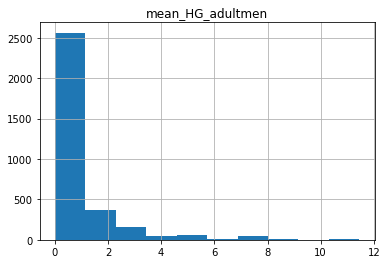

In [86]:
#Plot a histogram of the data fields
df.hist(data_fld, bins = 10);

In [87]:
#Create a map
theMap = gis.map('Madre de Dios, Peru')
#Set the basemap to satellite
theMap.basemap = 'satellite'
#Show the map
theMap

MapView(layout=Layout(height='400px', width='100%'))

In [89]:
#Plot the data on the map
df.spatial.plot(
    map_widget = theMap,
    renderer_type='c',  # for class breaks renderer
    line_width=0.0,
    method='esriClassifyQuantiles',  # classification algorithm
    class_count=10,  # choose the number of classes
    col=data_fld,  # numeric column to classify
    cmap='prism',  # color map to pick colors from for each class
    alpha=0.7  # specify opacity
)

True